In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

data=pd.read_csv("I://西瓜.csv")

In [3]:
def showData(data):
    plt.scatter(data[data.好瓜==1]['密度'],data[data.好瓜==1]['含糖率'],color = 'g')
    plt.scatter(data[data.好瓜==-1]['密度'],data[data.好瓜==-1]['含糖率'],color = 'b',marker='x')
    

In [4]:
def getRes(att,bound,less_flag):
    res=np.zeros([len(data[att])])
    if less_flag:
        res[data[att]<bound]=-1
        res[data[att]>bound]=1
    else:
        res[data[att]>bound]=-1
        res[data[att]<bound]=1
    return res


def getBound(att,weight):
    sort_num=np.sort(data[att])
    #print(sort_num)
    split_num=[(sort_num[i]+sort_num[i+1])/2 for i in range(len(sort_num)-1)]
    less_flag=None
    #print(split_num)
    min_err=10000000
    min_index=0

    for i in range(len(split_num)):
        left_res=getRes(att,split_num[i],less_flag=True)
        right_res=getRes(att,split_num[i],less_flag=False)
        #print(res)
        left_err=sum((left_res!=data['好瓜'])*weight)
        right_err=sum((right_res!=data['好瓜'])*weight)

        if left_err<min_err:
            min_err=left_err
            min_index=i
            less_flag=True
        if right_err<min_err:
            min_err=right_err
            min_index=i
            less_flag=False
        #print(err)
        #print("---------------")
    

    print('min_index:',min_index)
    print('bound:',split_num[min_index])
    print("----------")
    return split_num[min_index],less_flag



data_weight: [0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.05882353 0.05882353 0.05882353 0.05882353]
min_index: 3
bound: 0.38149999999999995
----------
error: 0.29411764705882354
res: [ 1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.]
error: 0.29411764705882354
data_weight: 0     0.041667
1     0.041667
2     0.041667
3     0.041667
4     0.041667
5     0.041667
6     0.041667
7     0.041667
8     0.100000
9     0.041667
10    0.041667
11    0.041667
12    0.100000
13    0.100000
14    0.041667
15    0.100000
16    0.100000
Name: 好瓜, dtype: float64
min_index: 7
bound: 0.20450000000000002
----------
error: 0.125
res: [ 1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.]
error: 0.125
data_weight: 0     0.023810
1     0.023810
2     0.023810
3     0.023810
4     0.023810
5     0.023810
6     0.166667
7     0.023810
8     0.057143
9     0.166667
10    0.

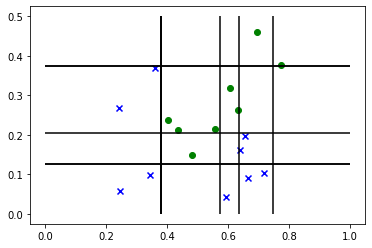

In [16]:

showData(data)
n=11
data_weight=np.ones([17])*1/17
class_weight=[]
flag_list=[]
for i in range(n):
    print('data_weight:',data_weight)
    if i%2==0:
        att='密度'
        
    else:
        att='含糖率'
    bound,less_flag=getBound(att,data_weight)
    
    res=getRes(att,bound,less_flag)

        
    error=sum((res!=data['好瓜'])*data_weight)
    print("error:",error)
    print('res:',res)
    
    print('error:',error)
    alpha=math.log((1-error)/error)/2
    class_weight.append(alpha)
    tmp_w=data_weight*np.exp(-(alpha*res*data['好瓜']))
    data_weight=tmp_w/sum(tmp_w)
    
    if i%2==0:
        
        plt.vlines(bound,0,0.5)
    else:
        plt.hlines(bound,0,1)
    
